In [1]:
import pandas as pd
from ixplore import IXPLORE

In [2]:
# Load reaction data (users × items matrix, values in {0, 1})
reactions = pd.read_csv('../data/binary_reactions.csv', index_col=0)

# Initialize and fit the model
model = IXPLORE(reactions, pca_initialization=True)

# Get user embeddings
embedding  = model.get_embedding()        # User positions (N × 2)
parameters = model.get_item_parameters()  # Item parameters (K × 3)

# Embed a new user based on their answers
new_user_answers = pd.Series({'Q1': 0.8, 'Q2': 0.2, 'Q3': 0.6}, name='new_user')
position = model.embed_new_user(new_user_answers)

# Predict all answers for a user
predicted = model.predict_all_answers(new_user_answers)

2026-02-14 23:39:37,226 - ixplore - INFO - Number of users for model: 250
2026-02-14 23:39:37,226 - ixplore - INFO - Number of items: 30
2026-02-14 23:39:37,227 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-14 23:39:37,227 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-14 23:39:37,230 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-14 23:39:37,230 - ixplore - INFO - Random state set to 0
2026-02-14 23:39:37,232 - ixplore - INFO - Initialized embedding with PCA.
2026-02-14 23:39:37,292 - ixplore - INFO - Fitted model parameters from embedding.


In [3]:
import numpy as np

model = IXPLORE(
    reactions,
    prior_mean=np.array([0, 0]),                # Prior center
    prior_cov=np.array([[0.1, 0], [0, 0.1]]),   # Prior covariance
    sampling_resolution=200,                    # Grid resolution for posteriors
    xlimits=(-1, 1),                            # X-axis bounds
    ylimits=(-1, 1),                            # Y-axis bounds
    pca_initialization=True,                    # Initialize with PCA
    random_state=17                             # For reproducibility
)

2026-02-14 23:39:37,302 - ixplore - INFO - Number of users for model: 250
2026-02-14 23:39:37,310 - ixplore - INFO - Number of items: 30
2026-02-14 23:39:37,313 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-14 23:39:37,315 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-14 23:39:37,318 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-14 23:39:37,319 - ixplore - INFO - Random state set to 17
2026-02-14 23:39:37,325 - ixplore - INFO - Initialized embedding with PCA.
2026-02-14 23:39:37,393 - ixplore - INFO - Fitted model parameters from embedding.


In [4]:
# Load pretrained embedding and model parameters
model = IXPLORE(
    reactions,
    pretrained_embedding='../data/pretrained_embedding.csv',
)

2026-02-14 23:39:37,398 - ixplore - INFO - Number of users for model: 250
2026-02-14 23:39:37,398 - ixplore - INFO - Number of items: 30
2026-02-14 23:39:37,399 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-14 23:39:37,400 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-14 23:39:37,403 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-14 23:39:37,403 - ixplore - INFO - Random state set to 0
2026-02-14 23:39:37,405 - ixplore - INFO - Pretrained embedding loaded from ../data/pretrained_embedding.csv
2026-02-14 23:39:37,405 - ixplore - INFO - Used pretrained embedding.
2026-02-14 23:39:37,470 - ixplore - INFO - Fitted model parameters from embedding.


2026-02-14 23:39:37,816 - ixplore - INFO - MAE: 0.10517874361360752, ACC: 0.9692


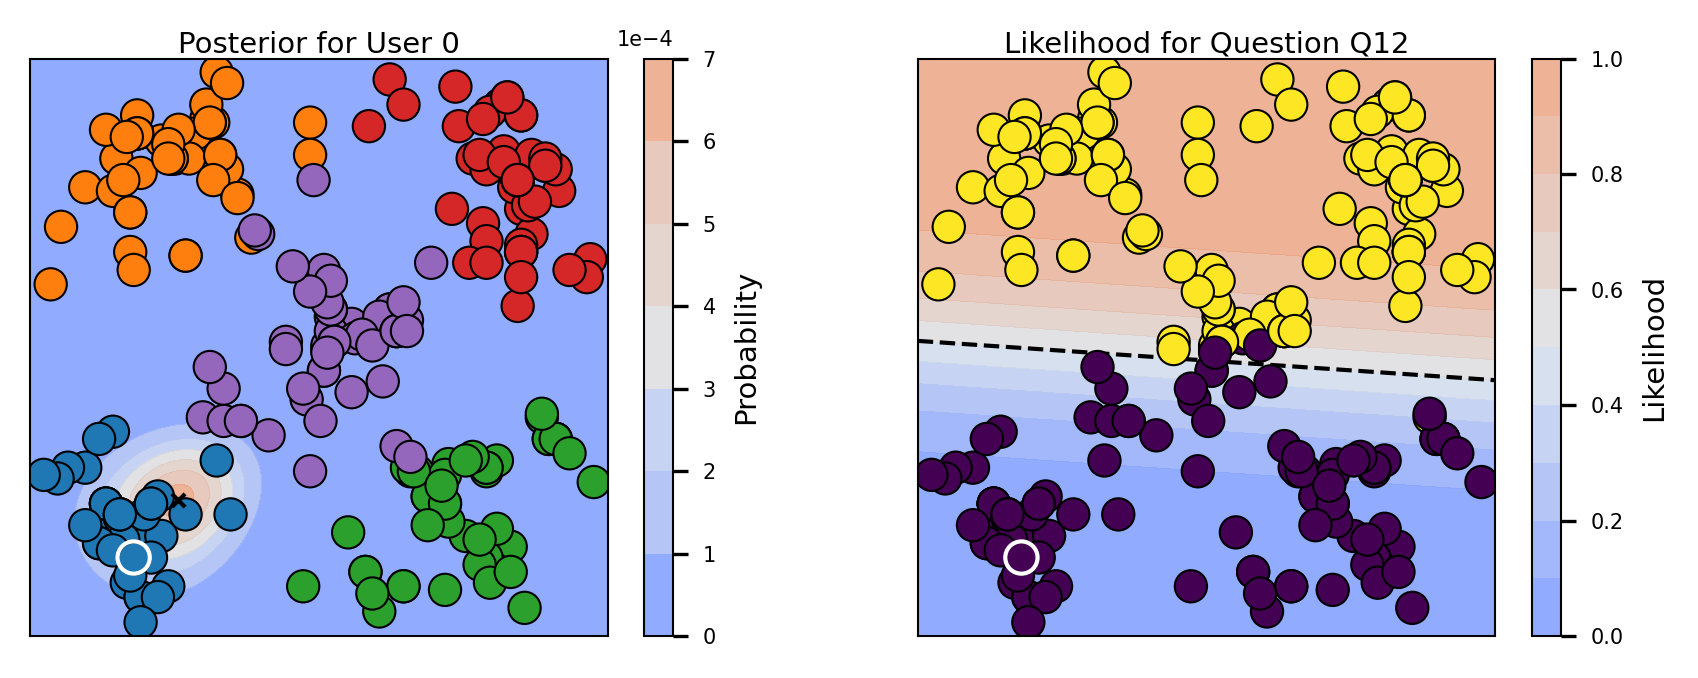

In [5]:
from ixplore.visualization import plot_overview

# Load user metadata (e.g., colors for plotting)
users = pd.read_csv('../data/synthetic_users.csv', index_col=0)

# Plot user embeddings
_ = plot_overview(model, question='Q12', user='0', colors=users.color, figsize=(7,2.5))